In [40]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sys
import numpy as np
sys.path.append('../../Code/')
from testWN import testWN as twm
from wntr.metrics import economic
import wntr
import scipy.io as sio
import os

In [41]:
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams['svg.fonttype'] = 'none'

In [42]:
%matplotlib qt

# Get Network Information

In [43]:
inp_file = '../../Code/c-town_true_network_simplified_controls.inp'
ctown = twm(inp_file)

nw_node_df = pd.DataFrame(ctown.wn.nodes.todict())
nw_link_df = pd.DataFrame(ctown.wn.links.todict())
node_names = ctown.getNodeName()
link_names = ctown.getLinkName()

# Load Result File

In [62]:
name_1 = '030_mod_018_results'

file_name = '/home/ffiedler/tubCloud/Shared/WDN_SurrogateModels/_RESULTS/MPC/001_economic/{}_sim_time.pkl'.format(name_1)
with open(file_name, 'rb') as f:
    res_1 = pickle.load(f)
    
res_1.node['pressure'].index = res_1.node['pressure'].index/3600

res_mpc_data = sio.loadmat('/home/ffiedler/tubCloud/Shared/WDN_SurrogateModels/_RESULTS/MPC/001_economic/{}_full_mpc_sol'.format(name_1))
res_mpc_flag = res_mpc_data['mpc_flag']
mpc_success = 100*np.sum(res_mpc_flag)/res_mpc_flag.size
print('mpc success: {:.2f}%'.format(mpc_success))

mpc success: 99.58%


In [68]:
name_2 = '027_mod_018_results'

file_name = '/home/ffiedler/tubCloud/Shared/WDN_SurrogateModels/_RESULTS/MPC/001_economic/{}_sim_time.pkl'.format(name_2)
with open(file_name, 'rb') as f:
    res_2 = pickle.load(f)
    
res_2.node['pressure'].index = res_2.node['pressure'].index/3600

res_mpc_data = sio.loadmat('/home/ffiedler/tubCloud/Shared/WDN_SurrogateModels/_RESULTS/MPC/001_economic/{}_full_mpc_sol'.format(name_2))
res_mpc_flag = res_mpc_data['mpc_flag']
mpc_success = 100*np.sum(res_mpc_flag)/res_mpc_flag.size
print('mpc success: {:.2f}%'.format(mpc_success))

mpc success: 99.72%


In [31]:
# data_path = ['/home/ffiedler/tubCloud/Shared/WDN_SurrogateModels/_RESULTS/150sim_noControls/']

# file_list = []
# for data_path_i in data_path:
#     file_list_i = os.listdir(data_path_i)
#     file_list_i = [data_path_i+file_k for file_k in file_list_i if '.pkl' in file_k]
#     file_list.extend(file_list_i)

# ref_list = []
# for file_i in file_list:
#     with open(file_i, 'rb') as f:
#         res_i=pickle.load(f)
#     ref_list.append(res_i)
    
# ref = ref_list[30]
# ref.node['pressure'].index = ref.node['pressure'].index/3600

# with open('/home/ffiedler/tubCloud/Shared/WDN_SurrogateModels/_RESULTS/150sim_noControls/results_sim_37_noControls.pkl', 'rb') as f:
#     ref = pickle.load(f)
    
# ref.node['pressure'].index = ref.node['pressure'].index/3600

# ref_cat_press = pd.concat([ref_i.node['pressure'] for ref_i in ref_list])
# ref_cat_head = pd.concat([ref_i.node['head'] for ref_i in ref_list])
# ref_cat_flow = pd.concat([ref_i.link['flowrate'] for ref_i in ref_list])

In [46]:
file_name = '/home/ffiedler/tubCloud/Shared/WDN_SurrogateModels/_RESULTS/results_sim_0_noControls.pkl'
with open(file_name, 'rb') as f:
    ref = pickle.load(f)
    
ref.node['pressure'].index = ref.node['pressure'].index/3600

# Pressure

In [37]:
fig, ax = plt.subplots(1,3, sharey='row')
ref.node['pressure'][node_names[2]].plot(legend=False, ax=ax[0], color='k', linewidth=0.5, alpha=0.1)
ax[0].set_xlabel('time [s]')
ax[0].set_ylabel('junction pressure [m]')
res_1.node['pressure'][node_names[2]].plot(legend=False, ax=ax[1], color='k', linewidth=0.5, alpha=0.1)
ax[1].set_xlabel('time [s]')
res_2.node['pressure'][node_names[2]].plot(legend=False, ax=ax[2], color='k', linewidth=0.5, alpha=0.1)
ax[2].set_xlabel('time [s]')

ax[0].set_title('reference')
ax[1].set_title(name_1)
ax[2].set_title(name_2)


Text(0.5, 1.0, '028_mod_018_results')

Pressure constraint violations:

In [69]:
perc_viol_ref = 100*(ref.node['pressure'][node_names[2]]<0).sum().sum()/np.prod(ref.node['pressure'].shape)
perc_viol_res_1 = 100*(res_1.node['pressure'][node_names[2]]<0).sum().sum()/np.prod(res_1.node['pressure'].shape)
perc_viol_res_2 = 100*(res_2.node['pressure'][node_names[2]]<0).sum().sum()/np.prod(res_2.node['pressure'].shape)
perc_viol_ref_avg = 100*(ref_cat_press<0).sum().sum()/np.prod(ref_cat_press.shape)

viol_max_ref = ref.node['pressure'].min().min()
viol_max_res_1 = res_1.node['pressure'].min().min()
viol_max_res_2 = res_2.node['pressure'].min().min()
viol_max_ref_all =ref_cat_press.min().min()

viol_mean_ref = ref.node['pressure'][ref.node['pressure']<0][node_names[2]].mean().mean()
viol_mean_res_1 = res_1.node['pressure'][res_1.node['pressure']<0][node_names[2]].mean().mean()
viol_mean_res_2 = res_2.node['pressure'][res_2.node['pressure']<0][node_names[2]].mean().mean()
viol_mean_ref_all = ref_cat_press[ref_cat_press<0][node_names[2]].mean().mean()

string = '{} with {:.2f}% violations, a max value of {:.2f} m and a mean of {:.2f}.'
print(string.format('Ref.',perc_viol_ref,viol_max_ref, viol_mean_ref))
print(string.format('Ref. (all 150 sim)',perc_viol_ref_avg,viol_max_ref_all, viol_mean_ref_all))
print(string.format(name_1,perc_viol_res_1,viol_max_res_1, viol_mean_res_1))
print(string.format(name_2,perc_viol_res_2,viol_max_res_2, viol_mean_res_2))

Ref. with 0.00% violations, a max value of -0.00 m and a mean of nan.
Ref. (all 150 sim) with 0.38% violations, a max value of -161.52 m and a mean of -27.90.
030_mod_018_results with 0.05% violations, a max value of -6.10 m and a mean of -2.13.
027_mod_018_results with 0.13% violations, a max value of -33.21 m and a mean of -5.12.


## Tank Levels

In [58]:
fig, ax = plt.subplots(1,3, sharey=True, sharex=True, figsize = (12,4))
ref.node['pressure'][node_names[0]].plot(legend=False, ax=ax[0], color='#8f8f8f', alpha=0.3)
res_1.node['pressure'][node_names[0]].plot(legend=False, ax=ax[1], color='#8f8f8f', alpha=0.3)
res_2.node['pressure'][node_names[0]].plot(legend=False, ax=ax[2], color='#8f8f8f', alpha=0.3)

time = np.array([ref.node['pressure'].index[0], ref.node['pressure'].index[-1]])
lines = []
for i, name_i in enumerate(node_names[0]):
    mean_i = ref.node['pressure'][name_i].mean()
    lines.append((ax[0].plot(time, np.array([mean_i,mean_i]), label=name_i, linewidth=3))[0])   
ax[0].legend(lines, node_names[0], title='mean level')

for i, name_i in enumerate(node_names[0]):
    mean_1 = res_1.node['pressure'][name_i].mean()
    mean_2 = res_2.node['pressure'][name_i].mean()
    ax[1].plot(time, np.array([mean_1,mean_1]), label=name_i, linewidth=3) 
    ax[2].plot(time, np.array([mean_2,mean_2]), label=name_i, linewidth=3) 

ax[0].set_ylabel('tank level [m]')
ax[0].set_xlabel('time [h]')
ax[1].set_xlabel('time [h]')
ax[2].set_xlabel('time [h]')

ax[0].set_title('Rule-based control')
ax[1].set_title('EMPC with lb 0.5')
ax[2].set_title('EMPC with lb 0')

# ax[1].axhline(1.5, linewidth=4, linestyle='--', color='#505050')
# ax[2].axhline(1.5, linewidth=4, linestyle='--', color='#505050')
# ax[1].text(98, 2, 'soft constraint', horizontalalignment='center', verticalalignment='center', rotation=90)

fig.tight_layout(pad=0.1, w_pad=0.5)

# Energy

In [64]:
pump_power_res_1 = economic.pump_energy(res_1.link['flowrate'], res_1.node['head'], ctown.wn)[link_names[0]]
#pump_power_mpc = pump_power_mpc[(pump_power_mpc>0).all(axis=1)]
pump_power_res_1.index = pump_power_res_1.index/3600

pump_power_res_2 = economic.pump_energy(res_2.link['flowrate'], res_2.node['head'], ctown.wn)[link_names[0]]
#pump_power_mpc_noise = pump_power_mpc_noise[(pump_power_mpc_noise>0).all(axis=1)]
pump_power_res_2.index = pump_power_res_2.index/3600

pump_power_rb = economic.pump_energy(ref.link['flowrate'], ref.node['head'], ctown.wn)[link_names[0]]
#pump_power_rb = pump_power_rb[(pump_power_rb>=0).all(axis=1)]
pump_power_rb.index = pump_power_rb.index/3600

In [20]:
fak = pump_power_mpc.shape[0]/pump_power_mpc_noise.shape[0]

In [24]:
fig, ax= plt.subplots(1,3, sharex=True, sharey=True)
pump_power_rb.plot(ax=ax[0],legend=False)
pump_power_mpc.plot(ax=ax[1],legend=True)
pump_power_mpc_noise.plot(ax=ax[2],legend=False)
ax[0].set_ylabel('pump power [W]')
ax[0].set_xlabel('time')
ax[1].set_xlabel('time')
ax[2].set_xlabel('time')
ax[0].set_title('Rule based')
ax[1].set_title('MPC (old)')
ax[2].set_title('MPC (new)')


fig.tight_layout()

In [65]:
energy_res_1 = np.sum(np.sum(pump_power_res_1.to_numpy().T/1e6))
energy_rb = np.sum(np.sum(pump_power_rb.to_numpy().T/1e6))
energy_res_2 = np.sum(np.sum(pump_power_res_2.to_numpy().T/1e6))

res_1_saving =100*(energy_rb-energy_res_1)/energy_rb
res_2_saving = 100*(energy_rb-energy_res_2)/energy_rb

print('{} power consumption:                      {:.2f} MWh'.format(name_1, energy_res_1))
print('{} power consumption:                      {:.2f} MWh'.format(name_2, energy_res_2))
print('Rule-based power consumption:              {:.2f} MWh'.format(energy_rb))
print('Power reduction {}: {:.2f}%'.format(name_1, res_1_saving))
print('Power reduction {}: {:.2f}%'.format(name_2, res_2_saving))

030_mod_018_results power consumption:                      106.49 MWh
029_mod_018_results power consumption:                      105.11 MWh
Rule-based power consumption:              111.57 MWh
Power reduction 030_mod_018_results: 4.55%
Power reduction 029_mod_018_results: 5.80%


# Check effect of control actions

In [79]:
fig, ax = plt.subplots(1,3)
for pump_i in link_names[0]:
    ax[0].plot(results_noise.link['setting'][pump_i].to_numpy(),results_noise.link['flowrate'][pump_i].to_numpy(),'.', label=pump_i)

ax[0].set_xlabel('setting')
ax[0].set_ylabel('flowrate [$m^3/s$]')
ax[0].set_title('Pumps')
ax[0].legend()

for valve_i in link_names[2]:
    ax[1].plot(results_noise.link['setting'][valve_i].to_numpy(),results_noise.link['headloss'][valve_i].to_numpy(),'.', label=valve_i)

for pump_i in link_names[0]:
    ax[2].plot(results_noise.link['setting'][pump_i].to_numpy(),pump_power_mpc_noise[pump_i].to_numpy(), 'x')
    
ax[1].set_xlabel('setting')
ax[1].set_ylabel('headloss [$m$]')
ax[1].set_title('Valves')
ax[1].legend()


fig.tight_layout()


# Check if controls are actually implemented

In [18]:
from go_mpc import go_mpc
from casadi import *
from casadi.tools import *
import scipy.io as sio
n_horizon = 10
nn_model_path = './model/007_man_5x50_both_datasets_filtered_mpc02/'
nn_model_name = '007_man_5x50_both_datasets_filtered_mpc02'
cluster_labels = pd.read_json(nn_model_path+'cluster_labels_dt1h_both_datasets.json')
pressure_factor = pd.read_json(nn_model_path+'pressure_factor_dt1h_both_datasets.json')
gmpc = go_mpc(n_horizon, nn_model_path, nn_model_name, cluster_labels, pressure_factor, 0, 1)

data_path = './tempResults/'
mpc_res_full = sio.loadmat(data_path + '006_mod_007_results_full_mpc_sol.mat')['x_mpc_full']

full_sol_cas = struct_symMX([
    entry('x', repeat=mpc_res_full.shape[0], struct = gmpc.obj_x)
])(0)
full_sol_cas['x'] = vertsplit(mpc_res_full) 


----------------------------------------------------
Loaded Keras model with the following architecture:
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 46)]              0         
_________________________________________________________________
dense_5 (Dense)              (None, 50)                2350      
_________________________________________________________________
dense_6 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_7 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_8 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_9 (Dense)              (None, 42)                2142      
Total params: 12,142

<IPython.core.display.Javascript object>


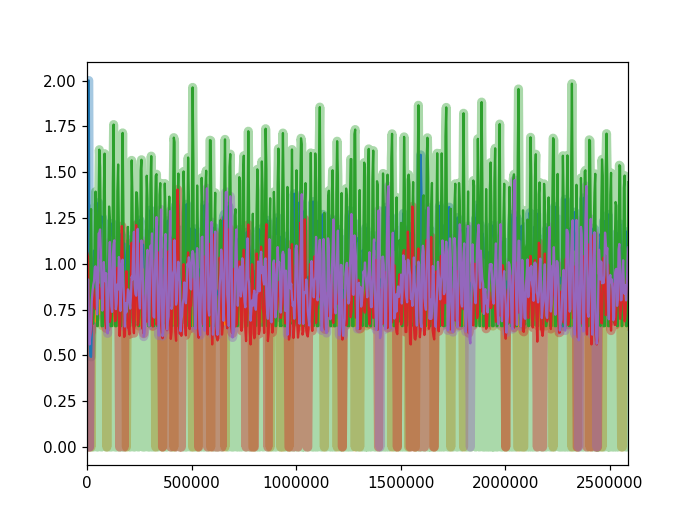

In [19]:
fig, ax = plt.subplots()

pump_speed_mpc = horzcat(*full_sol_cas['x',:,'u',0, 'head_pump']).T.full()
pump_speed_real = results.link['status'][link_names[0]].to_numpy()*results.link['setting'][link_names[0]]

pump_speed_real.plot(ax=ax, legend=False, linewidth=6, alpha=0.4)
ax.set_prop_cycle(None)
ax.plot(results.link['setting'].index, pump_speed_mpc)
plt.show()


# Check if clustering is still valid:

In [20]:
press_norm = results.node['pressure'][node_names[2]]/pressure_factor.to_numpy()

jun_cl_press_group = press_norm.groupby(cluster_labels.loc['pressure_cluster'], axis=1)
jun_cl_press_mean = jun_cl_press_group.mean()
jun_cl_press_std = jun_cl_press_group.std()

<IPython.core.display.Javascript object>


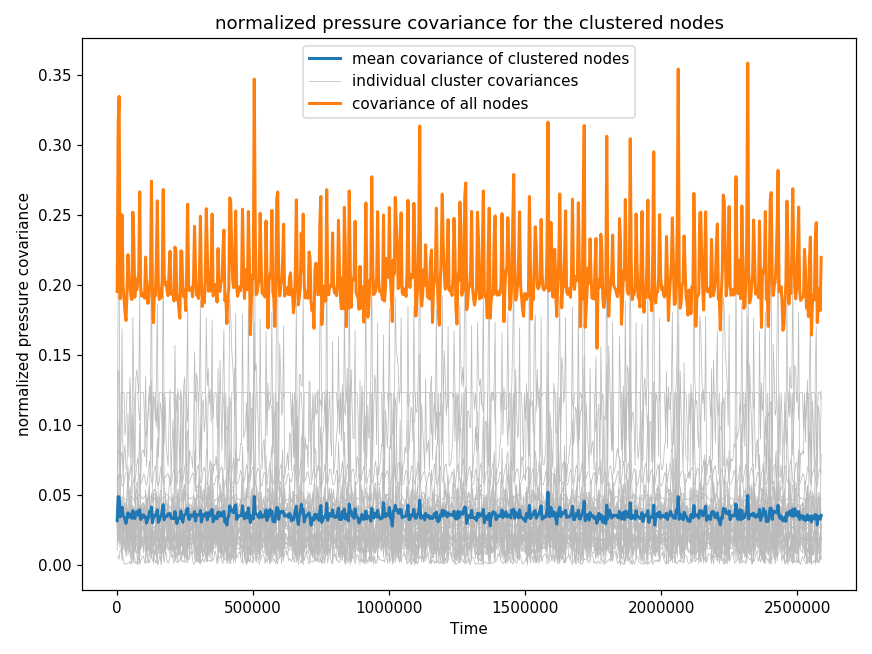

In [21]:
fig_2, ax_2 = plt.subplots(figsize=(8,6))

ax_2.plot(jun_cl_press_std, color='#bbbbbb', linewidth=0.5)
ax_2.plot(jun_cl_press_std.mean(axis=1), linewidth=2, alpha=1, label='mean covariance of clustered nodes')
ax_2.plot([0,0],[0,0], color='#bbbbbb', linewidth=0.5, label='individual cluster covariances')


press_std_ges = press_norm.std(axis=1)
ax_2.plot(press_std_ges, linewidth=2, alpha=1, label='covariance of all nodes')
ax_2.set_xlabel('Time')
ax_2.set_ylabel('normalized pressure covariance')
ax_2.set_title('normalized pressure covariance for the clustered nodes')

ax_2.legend()
fig_2.tight_layout()   

<IPython.core.display.Javascript object>


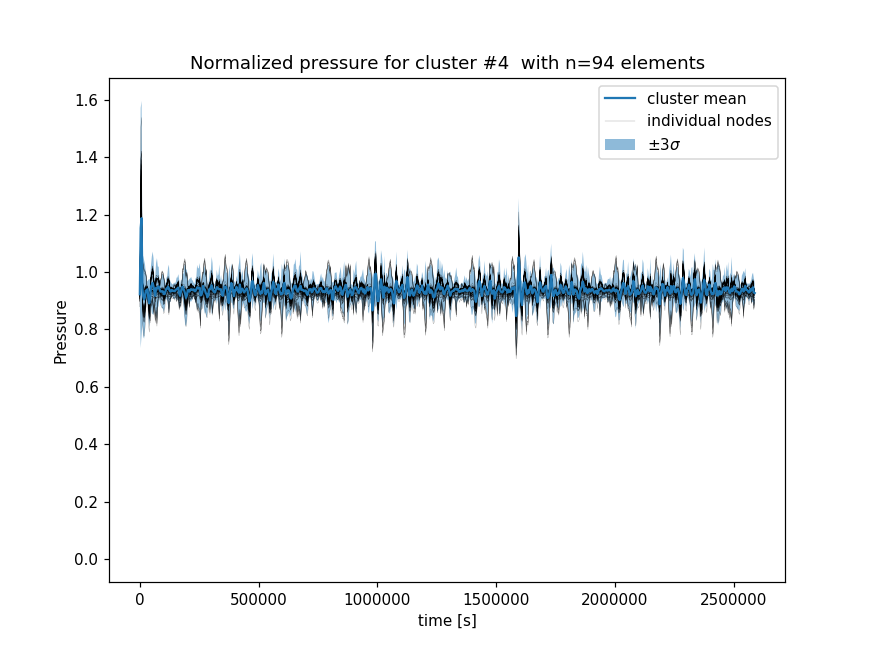

Text(0, 0.5, 'Pressure')

In [22]:
fig_2, ax_2 = plt.subplots(figsize=(8,6))

cluster_i=4

ax_2.fill_between(jun_cl_press_mean.index,
                  (jun_cl_press_mean[[cluster_i]]-3*jun_cl_press_std[[cluster_i]]).to_numpy().flatten(),
                  (jun_cl_press_mean[[cluster_i]]+3*jun_cl_press_std[[cluster_i]]).to_numpy().flatten(), 
                  alpha=0.5, label='$\pm 3\sigma$')
ax_2.plot(jun_cl_press_group.get_group(cluster_i),color='k', linewidth=0.2, alpha=0.5)
ax_2.plot(jun_cl_press_mean[[cluster_i]], label='cluster mean')
ax_2.plot([0,0],[0,0], color='k', linewidth=0.2, alpha=0.5, label='individual nodes')

ax_2.legend()
ax_2.set_title('Normalized pressure for cluster #{}  with n={} elements'.format(cluster_i, jun_cl_press_group.get_group(cluster_i).shape[1]))
ax_2.set_xlabel('time [s]')
ax_2.set_ylabel('Pressure')